In [2]:
import numpy as np
import scipy
from scipy import misc
import skimage
from skimage.io import imread_collection
import matplotlib.pyplot as plt
'''required libs'''

'required libs'

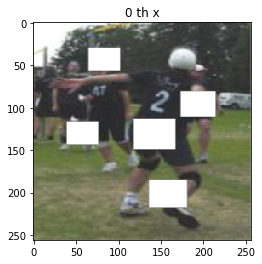

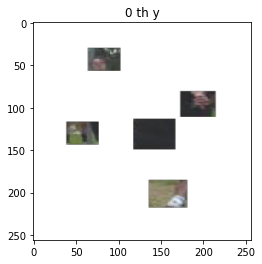

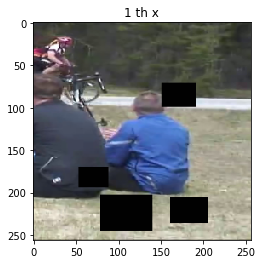

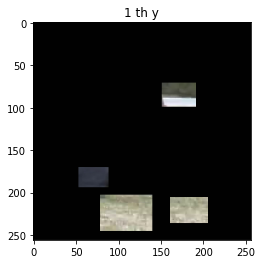

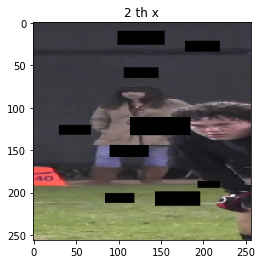

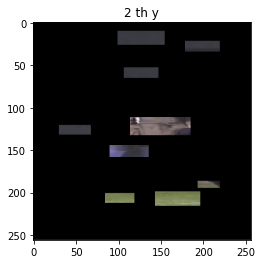

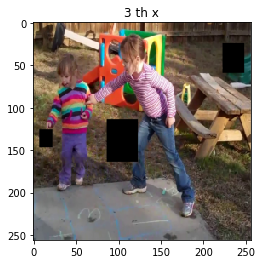

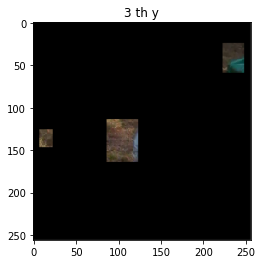

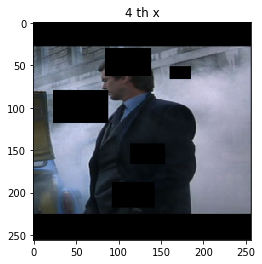

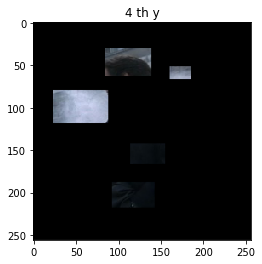

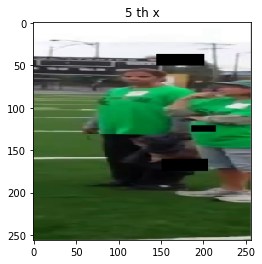

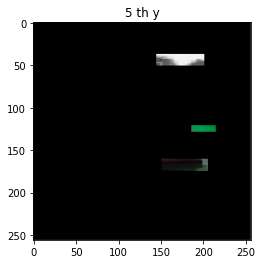

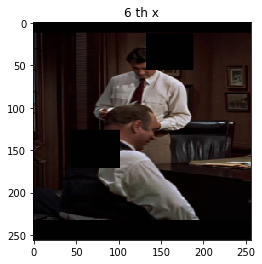

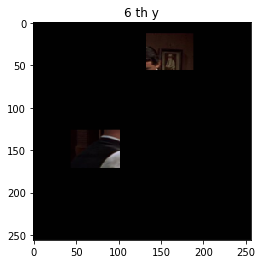

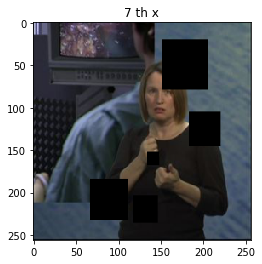

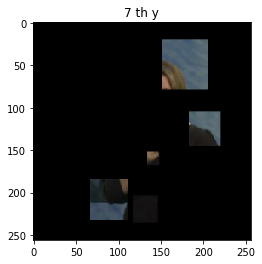

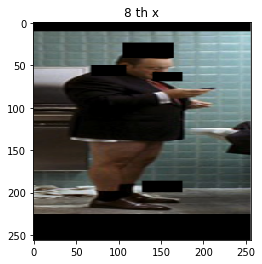

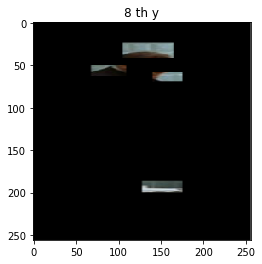

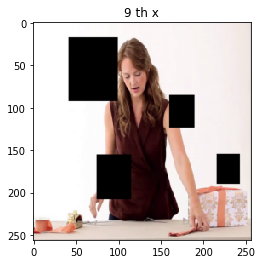

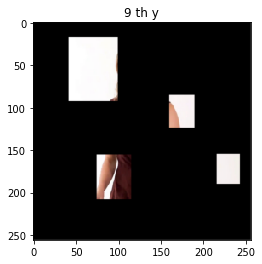

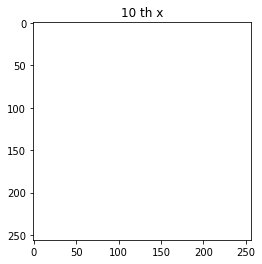

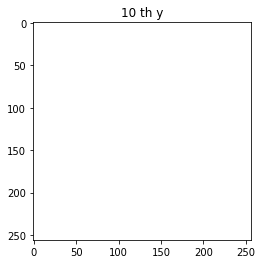

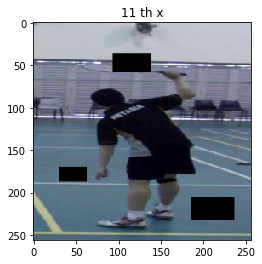

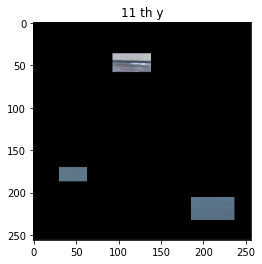

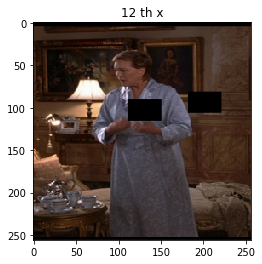

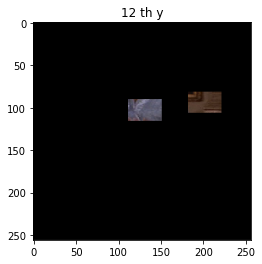

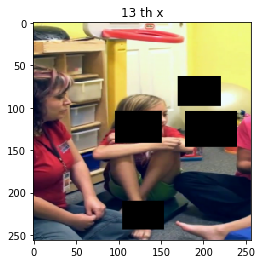

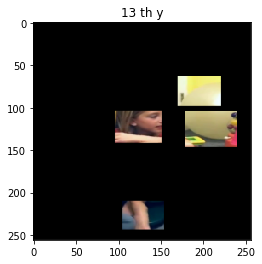

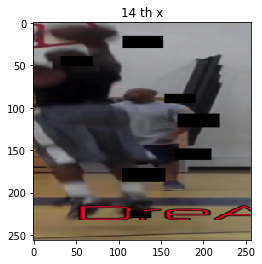

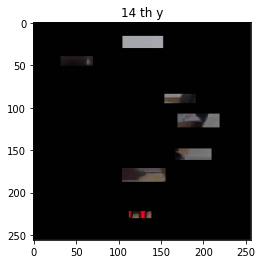

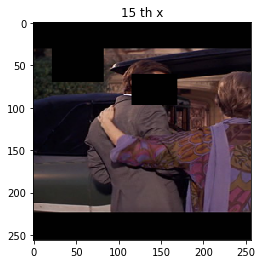

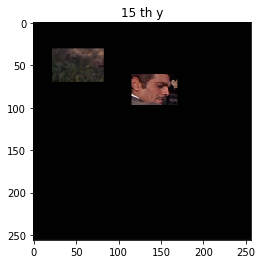

In [4]:
class DataLoader:
    def __init__(self, path):
        X_dir = path + '/X/*.png'
        Y_dir = path + '/Y/*.png'
        self.x = imread_collection(X_dir)
        self.y = imread_collection(Y_dir)
        self.IMG_CHN = 4
        self.iter = 0
        self.DATA_SIZE = 41125
        
    def next_batch(self, img_size = [256,256], batch_size = 64):
        x_b = np.zeros([batch_size, img_size[0], img_size[1], self.IMG_CHN])
        y_b = np.zeros([batch_size, img_size[0], img_size[1], self.IMG_CHN])
        i = 0
        
        while i < batch_size:
            x_b[i] = skimage.transform.resize(self.x[i], (img_size[0],img_size[1], self.IMG_CHN), anti_aliasing=True)
            y_b[i] = skimage.transform.resize(self.y[i], (img_size[0],img_size[1], self.IMG_CHN), anti_aliasing=True)   
            i +=1
        
        self.iter += i
        
        if self.iter > self.DATA_SIZE:
            self.iter = 0 #ugly loading
        
        return [x_b, y_b]


'''


USAGE DOWN HERE

Please see inpainting dataset here: http://chalearnlap.cvc.uab.es/dataset/30/description/ 

<Data Structure>:

-Main Folder
 |
 |-Inpainting_dataloader.ipynb
 |
 |-inpainting_dataset
   |
   |-X
   |    
   |-Y
   |-mask.json

'''
B_SIZE = 16
dl = DataLoader('./inpainting_dataset')
[x,y] = dl.next_batch(batch_size = B_SIZE)
for i in range(B_SIZE):
    plt.figure()
    plt.imshow(x[i])
    plt.title("{} th x".format(i))
    plt.figure()
    plt.imshow(y[i])
    plt.title("{} th y".format(i))
    
    
